<a href="https://colab.research.google.com/github/aziz0519/Advanced-Data-Science-Capstone-Project/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 of IBM Advanced Data Science Capstone Project

### In this project, I will be creating a predictive model to predict the prices of AirBnb services in Singapore as of 27 Feb 2020. The dataset is obtained from the Airbnb website as below:
### http://data.insideairbnb.com/singapore/sg/singapore/2020-02-27/visualisations/listings.csv

### I will be using the supervised learning techniques as taught in the 2nd course of this specialization. I will also use other models such as SVR (Support Vector Regression), LASSO, Rigde and ElasticNet. 

# **Exploratory Data Analysis of dataset**

##### Obtain required dataset


In [1]:
!wget https://raw.githubusercontent.com/aziz0519/Advanced-Data-Science-Capstone-Project/master/listings.csv

--2020-03-22 03:19:40--  https://raw.githubusercontent.com/aziz0519/Advanced-Data-Science-Capstone-Project/master/listings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1188761 (1.1M) [text/plain]
Saving to: ‘listings.csv’

listings.csv        100%[===================>]   1.13M  --.-KB/s    in 0.07s   

2020-03-22 03:19:40 (15.4 MB/s) - ‘listings.csv’ saved [1188761/1188761]



In [2]:
!pip install pyspark

     |████████████████████████████████| 217.8MB 58kB/s 
     |████████████████████████████████| 204kB 49.6MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=85675cff7113ff2b3c40246dedb3489558796849053da19acdaea7fa59f10f07
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, StringType
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()

In [4]:
spark.version

'2.4.5'

In [0]:
rdd = sc.textFile('listings.csv')
df = spark.read.csv(rdd,header=True)

In [6]:
df.createOrReplaceTempView('listings')
df.show()

+------+--------------------+-------+-------------+-------------------+-------------+--------+---------+------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|    id|                name|host_id|    host_name|neighbourhood_group|neighbourhood|latitude|longitude|   room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|
+------+--------------------+-------+-------------+-------------------+-------------+--------+---------+------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
| 49091|COZICOMFORT LONG ...| 266763|    Francesca|       North Region|    Woodlands| 1.44255| 103.7958|Private room|   84|           180|                1| 2013-10-21|             0.01|                             2|             365|
| 50646|Pleasant Room alo...| 227796|      Sujatha|     Cent

In [7]:
print(df.printSchema())

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: string (nullable = true)
 |-- minimum_nights: string (nullable = true)
 |-- number_of_reviews: string (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: string (nullable = true)
 |-- calculated_host_listings_count: string (nullable = true)
 |-- availability_365: string (nullable = true)

None


In [0]:
df.registerTempTable("listings")

#### As I would want to do a thorough analysis on the dataset, I will revert to conventional Python libraries to the data exploration and extract meaningful insights from the data.

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_listings = pd.read_csv('listings.csv')

In [11]:
df_listings.shape

(8047, 16)

In [12]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 16 columns):
id                                8047 non-null int64
name                              8045 non-null object
host_id                           8047 non-null int64
host_name                         8047 non-null object
neighbourhood_group               8047 non-null object
neighbourhood                     8047 non-null object
latitude                          8047 non-null float64
longitude                         8047 non-null float64
room_type                         8047 non-null object
price                             8047 non-null int64
minimum_nights                    8047 non-null int64
number_of_reviews                 8047 non-null int64
last_review                       5120 non-null object
reviews_per_month                 5120 non-null float64
calculated_host_listings_count    8047 non-null int64
availability_365                  8047 non-null int64
dtypes: float64(3

In [13]:
df_listings.describe()

id  ...  availability_365
count  8.047000e+03  ...       8047.000000
mean   2.622832e+07  ...        220.874115
std    1.176525e+07  ...        147.731172
min    4.909100e+04  ...          0.000000
25%    1.686457e+07  ...         75.000000
50%    2.811631e+07  ...        297.000000
75%    3.672920e+07  ...        363.000000
max    4.257871e+07  ...        365.000000

[8 rows x 10 columns]

In [0]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [0]:
#import statistical libraries
from scipy.stats import norm,skew, boxcox_normmax

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:287: UserWarning: Use the colorbar set_ticks() method instead.
  ax_i.set_yticks(newticks)


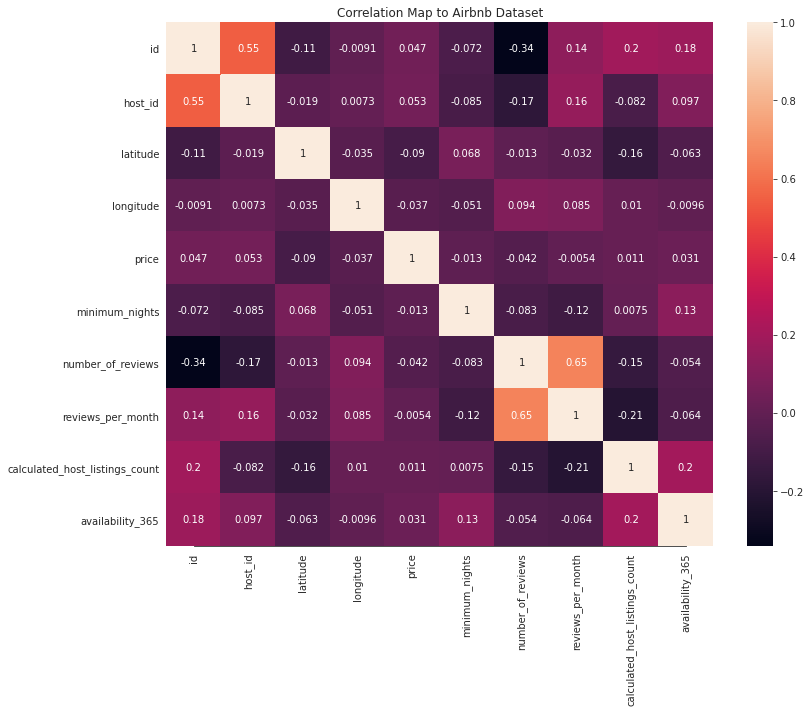

In [16]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map to Airbnb Dataset')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()


 mu = 170.213371 and sigma = 320.309329



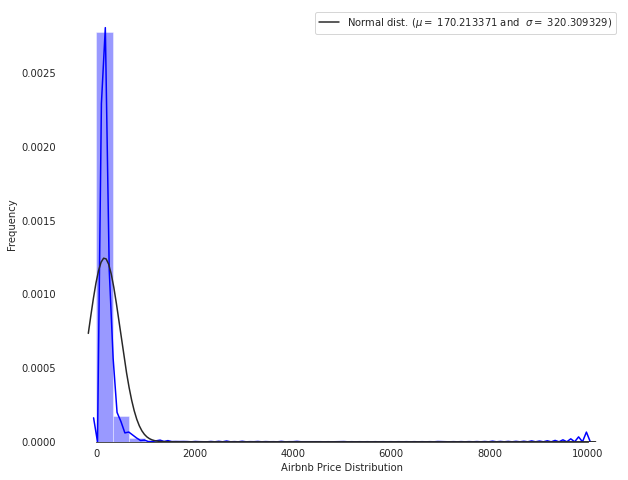

In [17]:
sns.set_palette('deep')
f,ax = plt.subplots(figsize=(10,8))
sns.distplot(df_listings['price'],fit=norm,color='b',bins=30)
(mu,sigma) = norm.fit(df_listings['price'])
print('\n mu = {:2f} and sigma = {:2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:2f} and  $\sigma=$ {:2f})'.format(mu, sigma)], loc='best')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='Airbnb Price Distribution')
sns.despine(trim=True,left=True)
plt.show()


 mu = 13.762147 and sigma = 32.689875



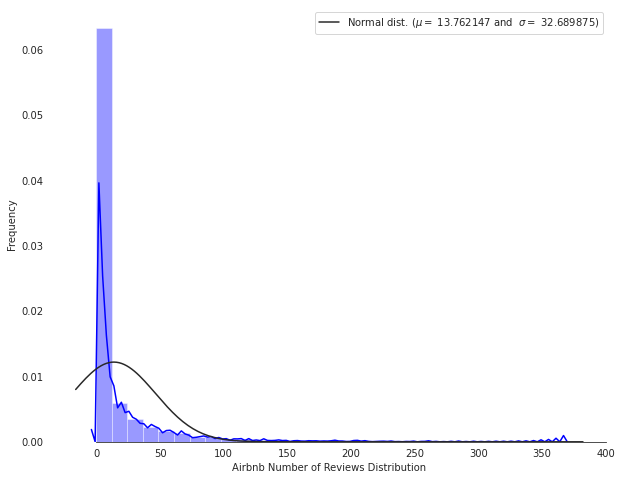

In [0]:
sns.set_palette('deep')
f,ax = plt.subplots(figsize=(10,8))
sns.distplot(df_listings['number_of_reviews'],fit=norm,color='b',bins=30)
(mu,sigma) = norm.fit(df_listings['number_of_reviews'])
print('\n mu = {:2f} and sigma = {:2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:2f} and  $\sigma=$ {:2f})'.format(mu, sigma)], loc='best')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='Airbnb Number of Reviews Distribution')
sns.despine(trim=True,left=True)
plt.show()

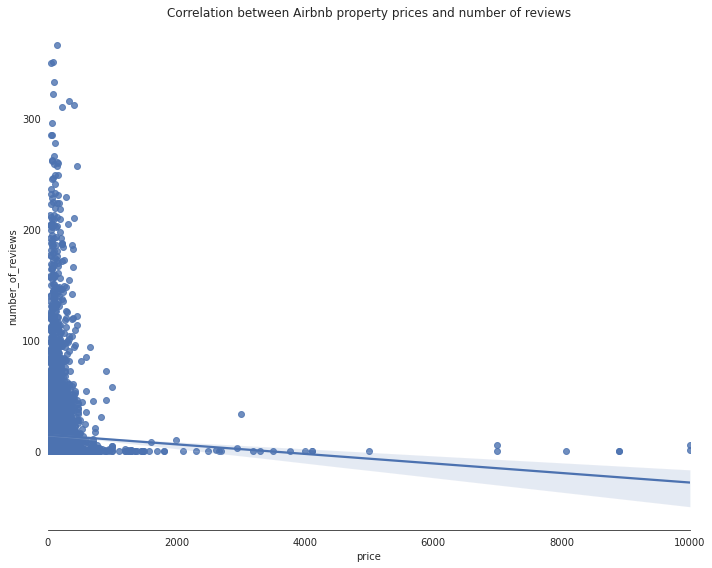

In [24]:
f, ax = plt.subplots(figsize=(10,8))
ax.xaxis.grid(False)
sns.regplot(x=df_listings['price'],y=df_listings['number_of_reviews'],fit_reg=True)
ax.set(title='Correlation between Airbnb property prices and number of reviews')
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

### The properties with high number of reviews comes from those priced below 2000 SGD. Hence, for the ETL section, we will filter out those Airbnb properties with very few reviews. 

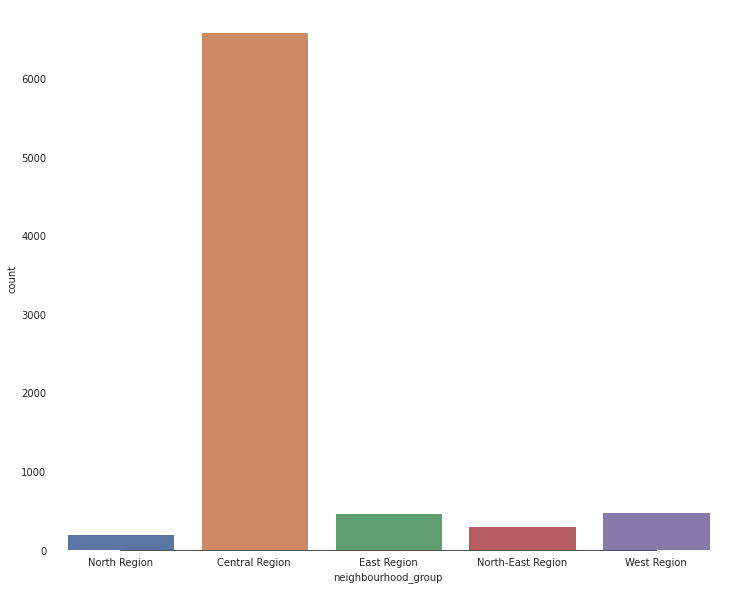

In [25]:
f, ax = plt.subplots(figsize=(12,10))
ax.xaxis.grid(False)
sns.countplot(df_listings['neighbourhood_group'])
sns.despine(trim=True,left=True)

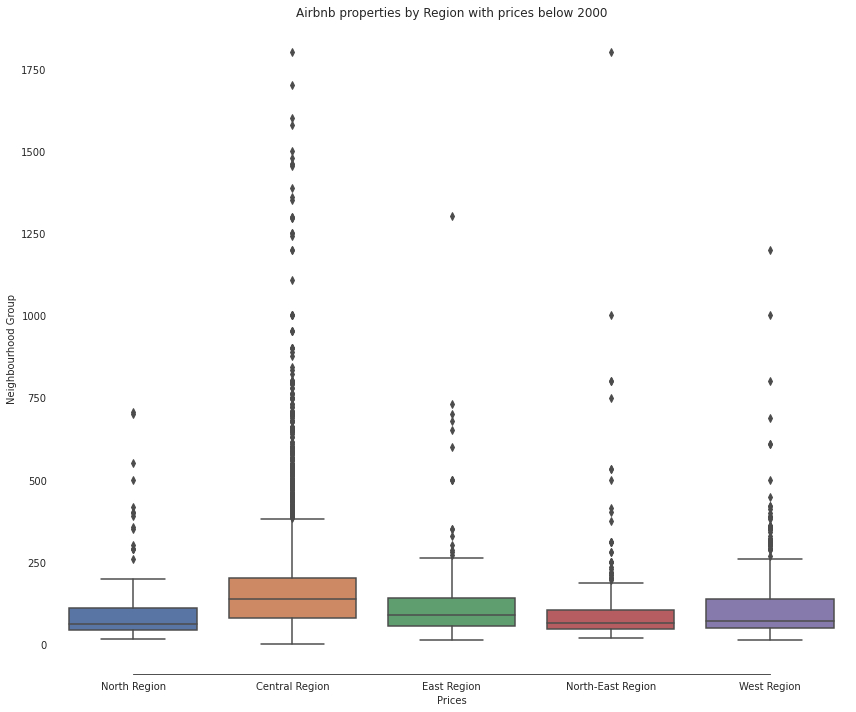

In [26]:
#Inspect distribuion of properties by regions and priced below 2000 SGD
prices_below2000 = df_listings[df_listings.price < 2000]
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='price',x='neighbourhood_group',data=prices_below2000)
ax.xaxis.grid(False)
ax.set(ylabel='Neighbourhood Group')
ax.set(xlabel='Prices')
ax.set(title="Airbnb properties by Region with prices below 2000")
sns.despine(trim=True,left=True)
plt.tight_layout()
plt.show()

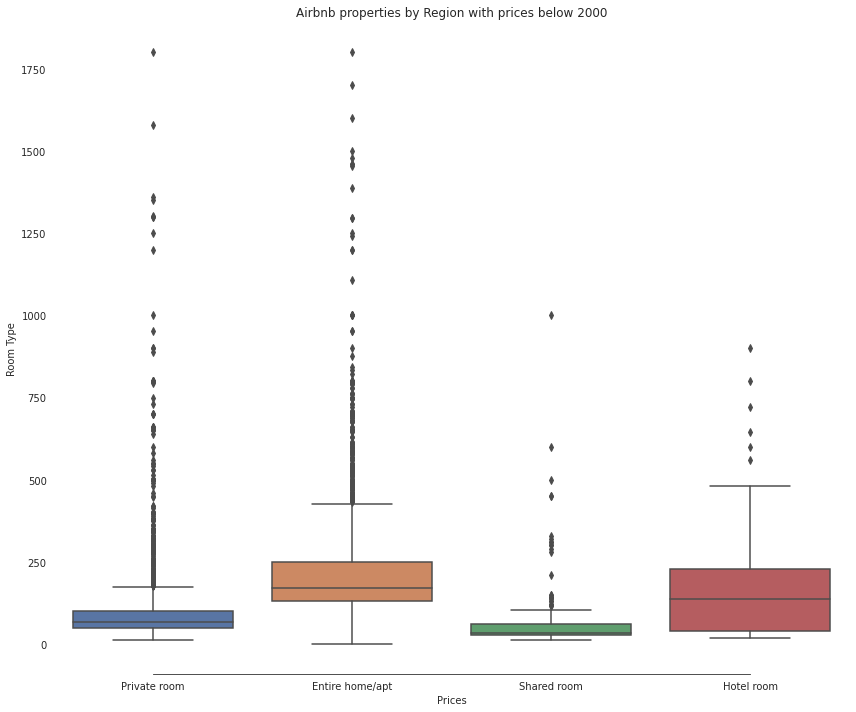

In [27]:
prices_below2000 = df_listings[df_listings.price < 2000]
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='price',x='room_type',data=prices_below2000)
ax.xaxis.grid(False)
ax.set(ylabel='Room Type')
ax.set(xlabel='Prices')
ax.set(title="Airbnb properties by Region with prices below 2000")
sns.despine(trim=True,left=True)
plt.tight_layout()
plt.show()

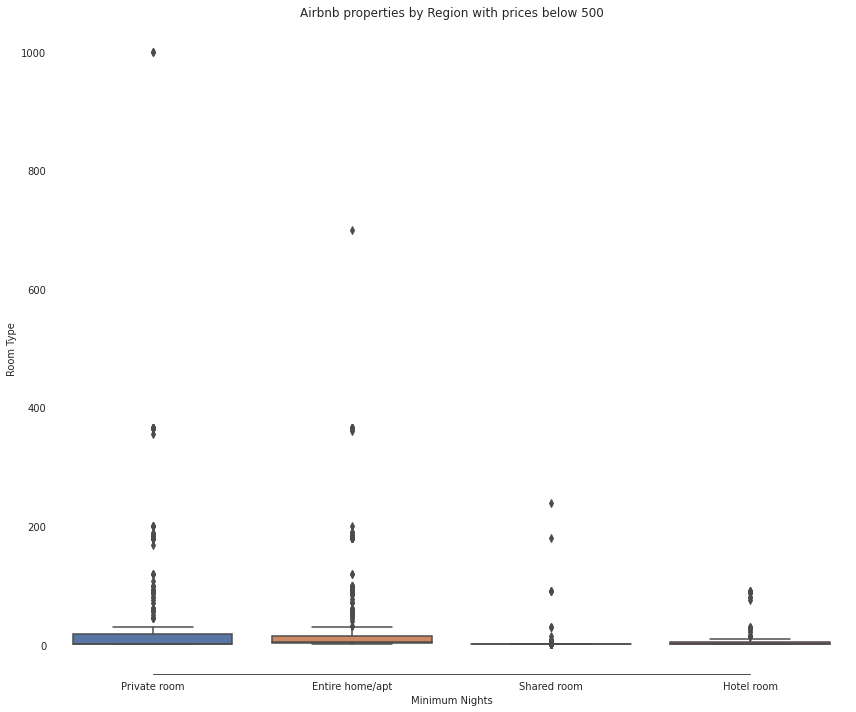

In [28]:
prices_below500 = df_listings[df_listings.price < 500]
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='minimum_nights',x='room_type',data=prices_below500)
ax.xaxis.grid(False)
ax.set(ylabel='Room Type')
ax.set(xlabel='Minimum Nights')
ax.set(title="Airbnb properties by Region with prices below 500")
sns.despine(trim=True,left=True)
plt.tight_layout()
plt.show()

In [0]:
import folium 
from folium.plugins import MarkerCluster

In [30]:
locations = df_listings[['latitude','longitude']]
locationlist = locations.values.tolist()
len(locationlist)

8047

In [0]:
#Identify locations of Airbnb properties on the Singapore Map
map = folium.Map(location=[1.44255,103.79580],tiles = 'Stamen Terrain',zoom_start=11)
marker_cluster1 = MarkerCluster().add_to(map)
for i in range(len(locationlist)):
  folium.Marker(locationlist[i]).add_to(marker_cluster1)

In [32]:
map

### From the map we can see that most of the properties are cluster near the central area of Singapore


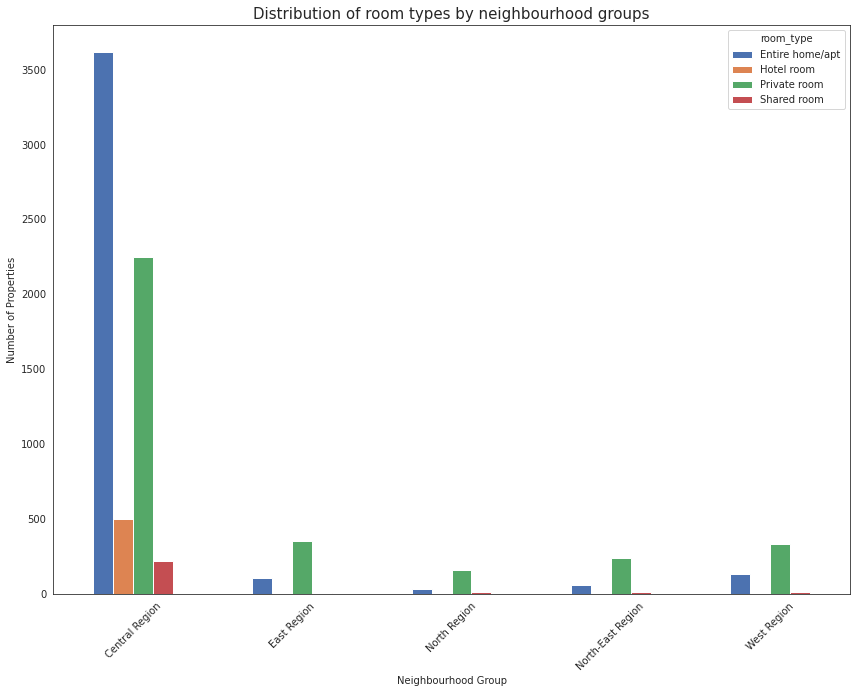

In [33]:
pd.crosstab(df_listings.neighbourhood_group,df_listings.room_type).plot(kind='bar',figsize=(12,10))
plt.title('Distribution of room types by neighbourhood groups',fontsize=15)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Properties')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

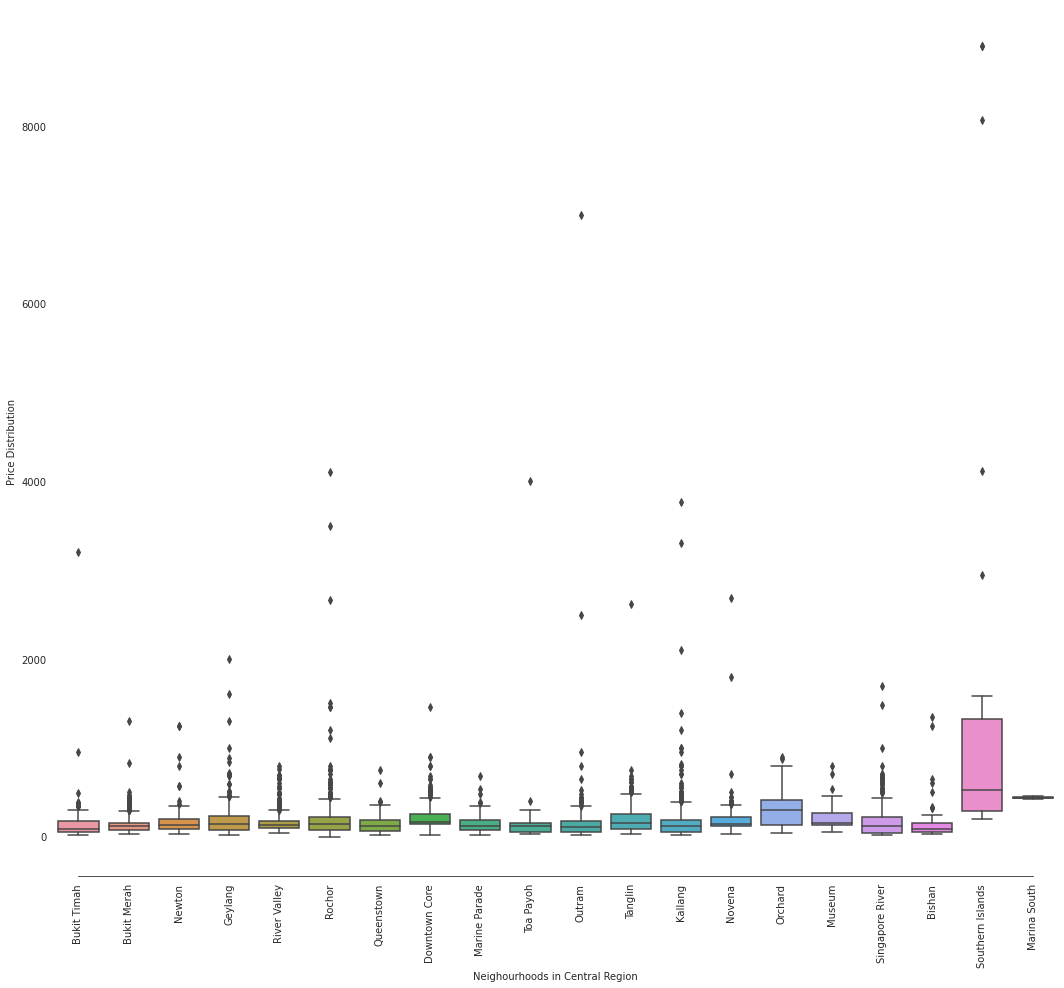

In [35]:
airbnb_central = df_listings[df_listings.neighbourhood_group == 'Central Region']
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central)
ax.xaxis.grid(False)
ax.set(ylabel='Price Distribution')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

In [36]:
airbnb_central_eh = airbnb_central[airbnb_central.room_type == 'Entire home/apt']
central_locations_eh = airbnb_central_eh[['latitude','longitude']]
central_locations_ehlist = central_locations_eh.values.tolist()
len(central_locations_ehlist)

3615

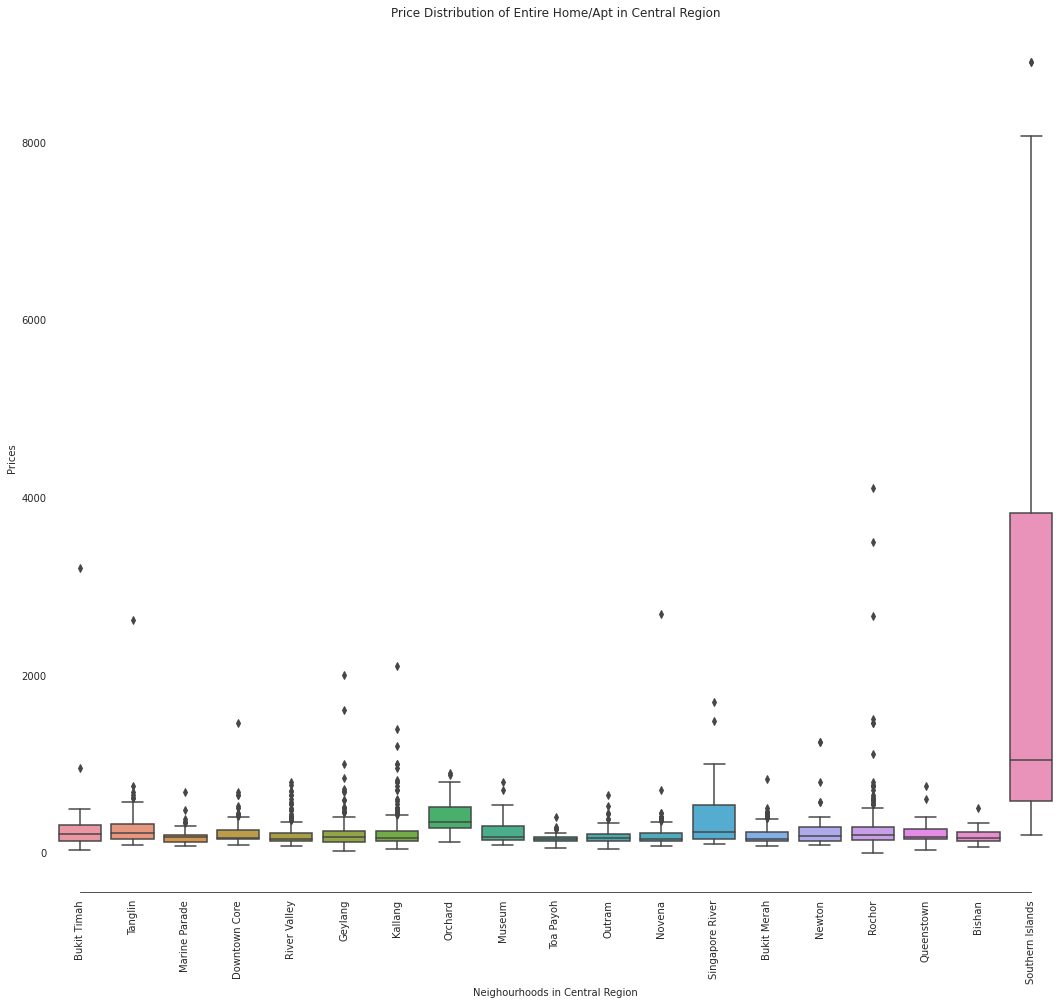

In [37]:
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central_eh)
ax.xaxis.grid(False)
ax.set(title='Price Distribution of Entire Home/Apt in Central Region')
ax.set(ylabel='Prices')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

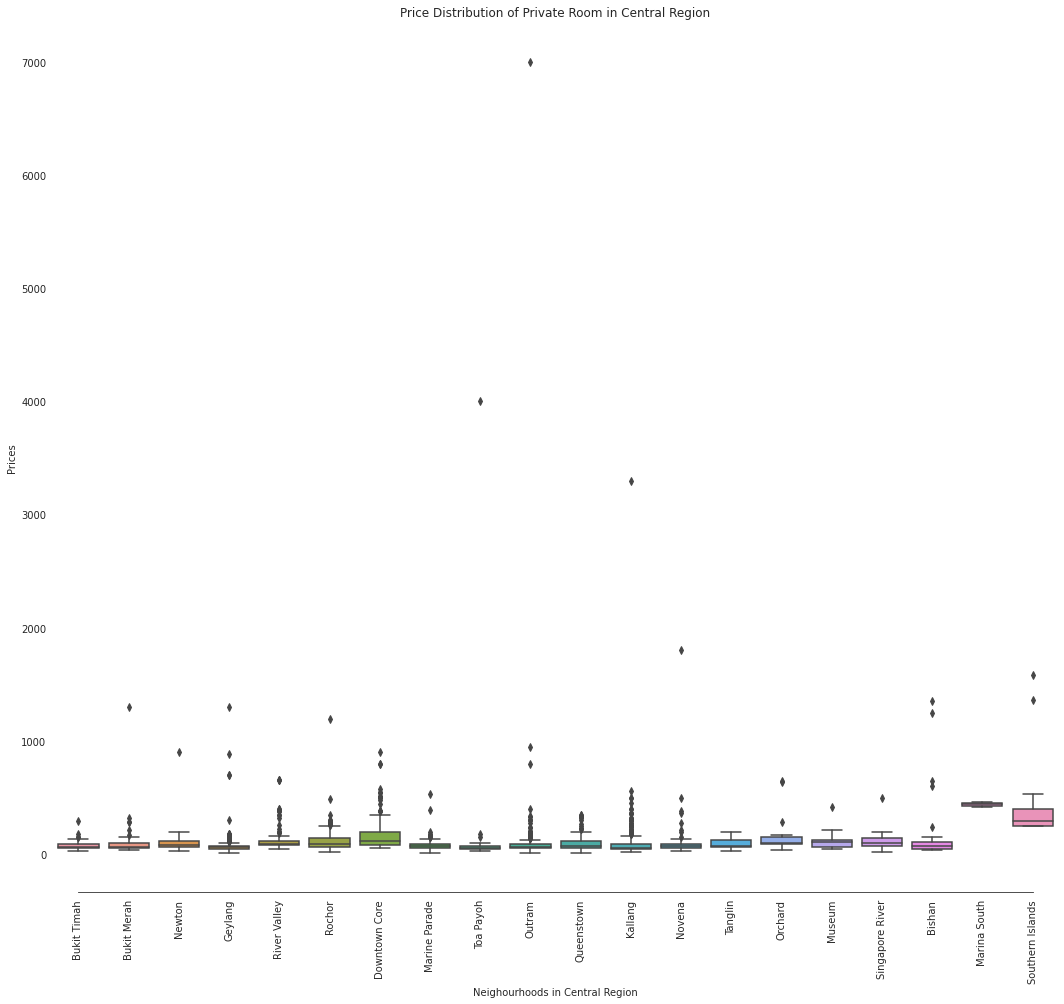

In [38]:
airbnb_central_pr = airbnb_central[airbnb_central.room_type == 'Private room']
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central_pr)
ax.xaxis.grid(False)
ax.set(title='Price Distribution of Private Room in Central Region')
ax.set(ylabel='Prices')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

In [39]:
#Identify locations of Airbnb properties on the Singapore Map
map1 = folium.Map(location=[1.44255,103.79580],zoom_start=11)
marker_cluster = MarkerCluster().add_to(map1)
for i in range(len(central_locations_ehlist)):
  folium.Marker(central_locations_ehlist[i]).add_to(marker_cluster)
map1

#### From the marker cluster map, we can see that most of the properties by which the room types is the Entire Home/Apartment is located at the central area where most of the shopping centres are located such as Kallang , Bugis and Orchard

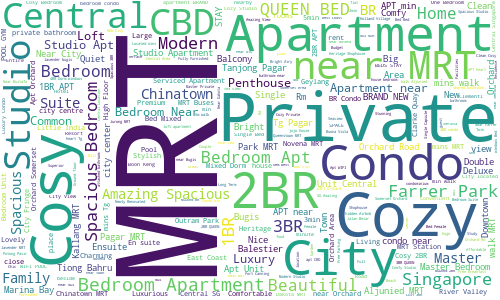

In [40]:
#wordcloud of names
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
stopwords  = set(STOPWORDS)
stopwords.update(["Room"]) #Add room to list of stopwords as it is commonly used term 
text = " ".join(str(x) for x in df_listings.name)
wc = WordCloud(width=500, height=300,max_words = 300,contour_width = 2,contour_color = 'steelblue',stopwords = stopwords, background_color ='white').generate(text)
wc.to_image()

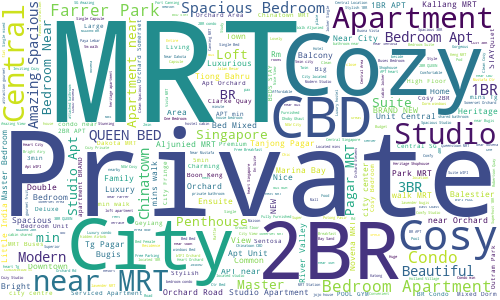

In [41]:
stopwords  = set(STOPWORDS)
stopwords.update(["Room"]) #Add room to list of stopwords as it is commonly used term 
text = " ".join(str(x) for x in airbnb_central.name)
wc = WordCloud(width=500, height=300,max_words = 300,contour_width = 2,contour_color = 'steelblue',stopwords = stopwords, background_color ='white').generate(text)
wc.to_image()

#### From the word cloud, the common terms used in promoting their Airbnb services focuses more on the location near the MRT and the comfort of the room or home apartment

### For the ETL section we will impute missing values as well as enrich with additional features such as distance of location to the nearest train (MRT) station

In [0]:
import plotly.express as px

In [72]:
fig = px.scatter_mapbox(airbnb_central_eh, lat="latitude", lon="longitude", hover_name="name", hover_data=["host_name", "room_type", "minimum_nights","price"], zoom=10, height=600,color="room_type", size="minimum_nights",
                  color_continuous_scale=px.colors.diverging, size_max=20)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [70]:
fig = px.scatter_mapbox(airbnb_central_pr, lat="latitude", lon="longitude", hover_name="name", hover_data=["host_name", "room_type", "minimum_nights","price"], zoom=10, height=600,color="room_type", size="minimum_nights",
                  color_continuous_scale=px.colors.diverging, size_max=20)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()